# Wave 2D
Numerical Method - Finite Difference. <br>
Code taken from [this tutorial](http://people.bu.edu/andasari/courses/numericalpython/Week12Lecture21/FD_wave1.py) and more details [here.](http://people.bu.edu/andasari/courses/numericalpython/python.html)<br>
```
u_tt = D*(u_xx + u_yy) 
```
Dirichlet Boundary Conditions : 
```
u=0 
```
Initial Distribution :
```
u(x,y,t=0) = 0.1(sin(pi*x) (sin(pi*y)/2))
```

Initial Velocity Condition :
```
u_t(x,y,t=0) = 0 
```

Stability Condition : 
```
r = (4D*dt^2)/(dx^2+dy^2)  < 1
```

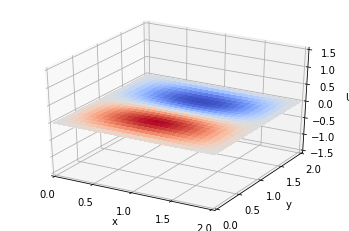

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        self.D = D
        self.Mx = Mx
        self.My = My
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
        
        
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: 0.1*np.sin(np.pi*r)*np.sin(np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        self.time = self.t
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):

        u_list = []
        u_list.append(self.u)

        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
        
        fig = plt.figure()        
        ax = fig.add_subplot(111, projection='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()
            
            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.01)
            k += 0.5
            u_list.append(self.u_1)

        u_array = np.asarray(u_list)
        return self.x, self.y, self.time, u_array
  
    
if __name__ == "__main__":
  N = 200 
  D = 0.25
  Mx = 50
  My = 50

  u_list = []
  grid_length = 51
  simulator = WaveEquationFD(N, D, Mx, My)
  x, y, t, u_sol = simulator.solve_and_animate()
  plt.show()




(401, 51, 51)

In [ ]:
import os
import time
from tqdm import tqdm 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline


!pip install pyDOE
from pyDOE import lhs
import torch
import torch.nn as nn

# %
default_device = "cuda" if torch.cuda.is_available() else "cpu"

dtype=torch.float32
torch.set_default_dtype(dtype)

def torch_tensor_grad(x, device):
    if device == 'cuda':
        x = torch.cuda.FloatTensor(x)
    else:
        x = torch.FloatTensor(x)
    x.requires_grad = True
    return x 

def torch_tensor_nograd(x, device):
    if device == 'cuda':
        x = torch.cuda.FloatTensor(x)
    else:
        x = torch.FloatTensor(x)
    x.requires_grad = False
    return x 


In [ ]:
# Setting the random seed. 
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

In [ ]:
#Setting up a Resnet as the PINN. 
class Resnet(nn.Module):
    def __init__(self, in_features, out_features, num_neurons, activation=torch.sin):
        super(Resnet, self).__init__()
        
        self.in_features = in_features
        self.out_features = out_features
        self.num_neurons = num_neurons
        
        self.act_func = activation
        
        self.block1_layer1 = nn.Linear(self.in_features, self.num_neurons)
        self.block1_layer2 = nn.Linear(self.num_neurons, self.num_neurons)
        self.block1 = [self.block1_layer1, self.block1_layer2]
        
        self.block2_layer1 = nn.Linear(self.in_features + self.num_neurons, self.num_neurons)
        self.block2_layer2 = nn.Linear(self.num_neurons, self.num_neurons)
        self.block2 = [self.block2_layer1, self.block2_layer2]
        
        # self.block3_layer1 = nn.Linear(self.in_features + self.num_neurons, self.num_neurons)
        # self.block3_layer2 = nn.Linear(self.num_neurons, self.num_neurons)
        # self.block3 = [self.block3_layer1, self.block3_layer2]
        
        # self.block4_layer1 = nn.Linear(self.in_features + self.num_neurons, self.num_neurons)
        # self.block4_layer2 = nn.Linear(self.num_neurons, self.num_neurons)
        # self.block4 = [self.block4_layer1, self.block4_layer2]
        
        self.layer_after_block = nn.Linear(self.num_neurons + self.in_features, self.num_neurons)
        self.layer_output = nn.Linear(self.num_neurons, self.out_features)
        
        
    def forward(self, x):
        
        x_temp = x
        
        for dense in self.block1:
            x_temp = self.act_func(dense(x_temp))
        x_temp = torch.cat([x_temp, x], dim=-1)
        
        for dense in self.block2:
            x_temp = self.act_func(dense(x_temp))
        x_temp = torch.cat([x_temp, x], dim=-1)
        
        # for dense in self.block3:
        #    x_temp = self.act_func(dense(x_temp))           
        # x_temp = torch.cat([x_temp, x], dim=-1)
        
        # for dense in self.block4:
        #    x_temp = self.act_func(dense(x_temp))
        # x_temp = torch.cat([x_temp, x], dim=-1)
        
        x_temp = self.act_func(self.layer_after_block(x_temp))
        x_temp = self.layer_output(x_temp)
        return x_temp

#Setting up a derivative function that goes through the graph and calculates via chain rule the derivative of u wrt x 
deriv = lambda u, x: torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True, allow_unused=True)[0]


In [ ]:
#Setting up an instance of the Resnet with the needed architecture. 
npde_net = Resnet(3, 1, 100)
npde_net = npde_net.to(default_device)


In [ ]:
! pip install pyDOE
from pyDOE import lhs

#Specifying the Domain of Interest. 
x_range = [0.0, 2.0]
y_range = [0.0, 2.0]
t_range = [0.0, 6.0]
D = 0.25

lb = np.asarray([x_range[0], y_range[0], t_range[0]])
ub = np.asarray([x_range[1], y_range[1], t_range[1]])

def LHS_Sampling(N):
    return lb + (ub-lb)*lhs(3, N)


In [ ]:

#Domain Loss Function - measuring the deviation from the PDE functional. 

def pde(X):

    x = X[:, 0:1]
    y = X[:, 1:2]
    t = X[:, 2:3]
    u = npde_net(torch.cat([x,y,t],1))

    u_x = deriv(u, x)
    u_xx = deriv(u_x, x)
    u_y = deriv(u, y)
    u_yy = deriv(u_y, y)
    u_t = deriv(u, t)
    u_tt = deriv(u_t, t)
    
    pde_loss = u_tt - D*(u_xx + u_yy)

    return pde_loss.pow(2).mean()




#Boundary Loss Function - measuring the deviation from boundary conditions for f(x_lim, y_lim, t)
def boundary(X):

    u = npde_net(X)
    bc_loss = u - 0 

    return bc_loss.pow(2).mean()

#Initial Velocity Conditions :
def initial_velocity(X):

    x = X[:, 0:1]
    y = X[:, 1:2]
    t = X[:, 2:3]
    u = npde_net(torch.cat([x,y,t],1))

    u_t = deriv(u, t)
    initial_cond_loss = u_t - 0

    return initial_cond_loss.pow(2).mean()


#Reconstruction Loss Function - measuring the deviation fromt the actual output. Used to calculate the initial loss
def reconstruction(X, Y):
    u = npde_net(X)
    recon_loss = u-Y
    return recon_loss.pow(2).mean()


In [ ]:
#Normalisation Strategies
def min_max_norm(x):
    return 2*(x-np.min(x))/(np.max(x)-np.min(x)) - 1

def z_score(x):
    return (x-np.mean(x)) / np.std(x)

def identity(x):
  return x


In [ ]:
#Samples taken from each region for optimisation purposes. 
N_i = 1000
N_b = 1000
N_f = 20000

In [ ]:
u = np.asarray(u_sol)
X, Y = np.meshgrid(x, y)
XY_star = np.hstack((X.flatten()[:,None], Y.flatten()[:,None]))
T_star = np.expand_dims(np.repeat(t, len(XY_star)), 1)
X_star_tiled = np.tile(XY_star, (len(t), 1))

X_star = np.hstack((X_star_tiled, T_star))
u_actual = np.expand_dims(u.flatten(),1)


In [ ]:
# Data for Initial Input 

X_IC = np.hstack((XY_star, np.zeros(len(XY_star)).reshape(len(XY_star), 1)))
u_IC = u[0].flatten()
u_IC = np.expand_dims(u_IC, 1)

idx = np.random.choice(X_IC.shape[0], N_i, replace=False) 
X_i = X_IC[idx]
u_i = u_IC[idx]

In [ ]:
# Data for Boundary Input

X_left = LHS_Sampling(N_b)
X_left[:,0:1] = x_range[0]

X_right = LHS_Sampling(N_b)
X_right[:,0:1] = x_range[1]

X_bottom = LHS_Sampling(N_b)
X_bottom[:,1:2] = y_range[0]

X_top = LHS_Sampling(N_b)
X_top[:,1:2] = y_range[1]

X_b = np.vstack((X_right, X_top, X_left, X_bottom))
np.random.shuffle(X_b) 

In [ ]:
#Data for Domain Input
X_f = LHS_Sampling(N_f)


In [ ]:
#Converting to tensors 

X_i = torch_tensor_grad(X_i)
Y_i = torch_tensor_nograd(u_i)
X_b = torch_tensor_grad(X_b)
X_f = torch_tensor_grad(X_f)

Streaming output truncated to the last 5000 lines.
It: 5001, Init: 3.241e-05, Bound: 8.560e-05, Domain: 1.392e-04
It: 5002, Init: 3.247e-05, Bound: 8.583e-05, Domain: 1.388e-04
It: 5003, Init: 3.202e-05, Bound: 8.539e-05, Domain: 1.389e-04
It: 5004, Init: 3.152e-05, Bound: 8.535e-05, Domain: 1.387e-04
It: 5005, Init: 3.146e-05, Bound: 8.526e-05, Domain: 1.386e-04
It: 5006, Init: 3.175e-05, Bound: 8.515e-05, Domain: 1.386e-04
It: 5007, Init: 3.196e-05, Bound: 8.533e-05, Domain: 1.383e-04
It: 5008, Init: 3.187e-05, Bound: 8.502e-05, Domain: 1.384e-04
It: 5009, Init: 3.154e-05, Bound: 8.505e-05, Domain: 1.382e-04
It: 5010, Init: 3.134e-05, Bound: 8.485e-05, Domain: 1.381e-04
It: 5011, Init: 3.136e-05, Bound: 8.478e-05, Domain: 1.381e-04
It: 5012, Init: 3.151e-05, Bound: 8.486e-05, Domain: 1.379e-04
It: 5013, Init: 3.160e-05, Bound: 8.466e-05, Domain: 1.379e-04
It: 5014, Init: 3.149e-05, Bound: 8.472e-05, Domain: 1.377e-04
It: 5015, Init: 3.132e-05, Bound: 8.450e-05, Domain: 1.377e-04
It: 

Text(0, 0.5, 'L2 Error')

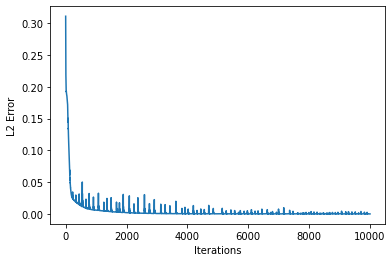

In [ ]:
#Training Loop
optimizer = torch.optim.Adam(npde_net.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5000, gamma=0.9)

it=0
epochs = 10000
loss_list = []

start_time = time.time()
while it < epochs :
    optimizer.zero_grad()

    initial_loss = reconstruction(X_i, Y_i) + initial_velocity(X_i)
    boundary_loss = boundary(X_b)
    domain_loss = pde(X_f)

    loss = initial_loss + boundary_loss + domain_loss   
    loss_list.append(loss.item())
    
    loss.backward()
    optimizer.step()
    scheduler.step()

    it += 1

    print('It: %d, Init: %.3e, Bound: %.3e, Domain: %.3e' % (it, initial_loss.item(), boundary_loss.item(), domain_loss.item()))


train_time = time.time() - start_time
plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('L2 Error')

In [ ]:
#Getting the trained output. 
if default_device == 'cpu':
    with torch.no_grad():
        u_pred = npde_net(torch_tensor_grad(X_star)).detach().numpy()

else : 
    with torch.no_grad():
        u_pred = npde_net(torch_tensor_grad(X_star)).cpu().detach().numpy()
        
# l2_error = np.mean((u_actual - u_pred)**2)

# print('Training Time: %d seconds, L2 Error: %.3e' % (train_time, l2_error))

u_pred = u_pred.reshape(N+1, grid_length, grid_length)

In [ ]:
!pip install celluloid
from celluloid import Camera
from IPython.display import HTML

def animation_2D(data):
  fig = plt.figure()
  camera = Camera(fig)
  for ii in range(len(data)):
      plt.imshow(data[ii])
      camera.snap()
  animation = camera.animate()

  return animation


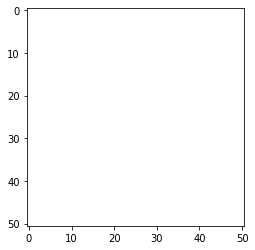

In [ ]:
animate = animation_2D(u)
HTML(animate.to_html5_video())


In [ ]:
animate = animation_2D(u_pred))
HTML(animate.to_html5_video())

SyntaxError: ignored

In [ ]:
from matplotlib import cm
from matplotlib import animation
from IPython.display import HTML

def 3D_animation(name, data):
    wave_name = name
    u_field = data
    xx, yy = np.meshgrid(x,y)


    def update_plot(frame_number, u_field, plot):
        plot[0].remove()
        plot[0] = ax.plot_surface(xx, yy, u_field[frame_number], cmap=cm.coolwarm, linewidth=2, antialiased=False)
        
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    plot = [ax.plot_surface(xx, yy, u_field[0], cmap=cm.coolwarm, linewidth=2, antialiased=False)]

    ax.set_xlim3d(0, 2.0)
    ax.set_ylim3d(0, 2.0)
    ax.set_zlim3d(-1.5, 1.5)
    
    ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("U")

    #plt.tight_layout()
    # ax.view_init(elev=30., azim=-110)


    fps = 50 # frame per sec
    frn = len(u_field) # frame number of the animation

    anim = animation.FuncAnimation(fig, update_plot, frn, fargs=(u_field, plot), interval=1000/fps)
    return anim

In [ ]:
animate = animation_3D('Numerical', u)
HTML(animate.to_html5_video())

In [ ]:
animate = animation_3D('PINN', u_pred)
HTML(animate.to_html5_video())